# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources (README.md file)
- Happy learning!

In [190]:
# import numpy and pandas
import pandas as pd




# Challenge 1 - Independent Sample T-tests

In this challenge, we will be using the Pokemon dataset. Before applying statistical methods to this data, let's first examine the data.

To load the data, run the code below.

In [191]:
# Run this code:

pokemon = pd.read_csv('../pokemon.csv')

Let's start off by looking at the `head` function in the cell below.

In [192]:
# Your code here:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


The first thing we would like to do is compare the legendary Pokemon to the regular Pokemon. To do this, we should examine the data further. What is the count of legendary vs. non legendary Pokemons?

In [193]:
# Your code here:
pokemon.Legendary.value_counts()


False    735
True      65
Name: Legendary, dtype: int64

Compute the mean and standard deviation of the total points for both legendary and non-legendary Pokemon.

In [194]:
# Your code here:
legen = pokemon[pokemon['Legendary'] == True] 
non = pokemon[pokemon['Legendary'] == False] 


In [195]:
legen

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
156,144,Articuno,Ice,Flying,580,90,85,100,95,125,85,1,True
157,145,Zapdos,Electric,Flying,580,90,90,85,125,90,100,1,True
158,146,Moltres,Fire,Flying,580,90,100,90,125,85,90,1,True
162,150,Mewtwo,Psychic,NaN,680,106,110,90,154,90,130,1,True
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [196]:
media_legen = legen['Total'].mean()
std_legen = legen['Total'].std()

media_non = non['Total'].mean()
std_non = non['Total'].std()

The computation of the mean might give us a clue regarding how the statistical test may turn out; However, it certainly does not prove whether there is a significant difference between the two groups.

In the cell below, use the `ttest_ind` function in `scipy.stats` to compare the the total points for legendary and non-legendary Pokemon. Since we do not have any information about the population, assume the variances are not equal.

Comprobar primero si sigue una distribución normal


In [197]:
from scipy.stats import ttest_ind

In [198]:
# Your code here:

ttest_ind(legen.Total, non.Total, 
          alternative='two-sided',
          equal_var=False   
         )


Ttest_indResult(statistic=25.8335743895517, pvalue=9.357954335957446e-47)

What do you conclude from this test? Write your conclusions below.

Como el pvalor es menor a 0,05 que es con una fiabilidad del 95% podemos rechazar la hipotesis nula que dice que no hay diferencia en los puntos totales entre los legendarios y los no legendarios

How about we try to compare the different types of pokemon? In the cell below, list the types of Pokemon from column `Type 1` and the count of each type.

In [199]:
# Your code here:

pokemon['Type 1'].value_counts()



Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ground       32
Ghost        32
Dark         31
Poison       28
Steel        27
Fighting     27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64

Since water is the largest group of Pokemon, compare the mean and standard deviation of water Pokemon to all other Pokemon.

In [200]:
# Your code here:

pok_water = pokemon[pokemon['Type 1'] == 'Water']

pok_nowater = pokemon[pokemon['Type 1'] != 'Water']


In [201]:
media_water = pok_water.Total.mean()
std_water = pok_water.Total.std()

media_nowater = pok_nowater.Total.mean()
std_nowater = pok_nowater.Total.std()

print(f'Media de pokemon agua: {media_water}')
print(f'Media de pokemon no agua: {media_nowater}')

print(f'Desviación de pokemon agua: {std_water}')
print(f'Desviación de pokemon no agua: {std_nowater}')

Media de pokemon agua: 430.45535714285717
Media de pokemon no agua: 435.85901162790697
Desviación de pokemon agua: 113.18826606431458
Desviación de pokemon no agua: 121.09168230208066


Perform a hypothesis test comparing the mean of total points for water Pokemon to all non-water Pokemon. Assume the variances are equal. 

In [202]:
# Your code here:

ttest_ind(pok_nowater.Total, pok_water.Total, 
          alternative='two-sided',
          equal_var=True   
         )

Ttest_indResult(statistic=0.4418547448849676, pvalue=0.6587140317488793)

Write your conclusion below.

No tenemos suficiente evidencia para rechazar la hipotesis nula h0 ya que el pvalor es mayor a 0,05

# Challenge 2 - Matched Pairs Test

In this challenge we will compare dependent samples of data describing our Pokemon. Our goal is to see whether there is a significant difference between each Pokemon's defense and attack scores. Our hypothesis is that the defense and attack scores are equal. In the cell below, import the `ttest_rel` function from `scipy.stats` and compare the two columns to see if there is a statistically significant difference between them.

In [203]:
from scipy.stats import ttest_rel

In [204]:
# Your code here:

ttest_rel(pokemon.Attack, pokemon.Defense, 
          alternative='two-sided',
  
        )

TtestResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05, df=799)

Describe the results of the test in the cell below.

Se puede rechazar la hipotesis nula h0 ya que el pvalor es menor que 0,05

Por lo tanto los scores de Defense y Attack son distintos 

We are also curious about whether therer is a significant difference between the mean of special defense and the mean of special attack. Perform the hypothesis test in the cell below. 

In [205]:
# Your code here:

ttest_rel(pokemon['Sp. Atk'], pokemon['Sp. Def'], 
          alternative='two-sided',
  
        )



TtestResult(statistic=0.853986188453353, pvalue=0.3933685997548122, df=799)

Describe the results of the test in the cell below.

No hay suficiente evidencia para rechazar la hipotesis nula ya que el pvalor es mucho mayor a 0,05

Esto quiere decit que entre el Sp. Def y el Sp. Attack no hay diferencias significativas 

As you may recall, a two sample matched pairs test can also be expressed as a one sample test of the difference between the two dependent columns.

Import the `ttest_1samp` function and perform a one sample t-test of the difference between defense and attack. Test the hypothesis that the difference between the means is zero. Confirm that the results of the test are the same.

In [206]:
from scipy.stats import ttest_1samp

In [207]:
# Your code here:
    
ttest_1samp(pokemon.Attack - pokemon.Defense, 0)   

TtestResult(statistic=4.325566393330478, pvalue=1.7140303479358558e-05, df=799)

# Bonus Challenge - The Chi-Square Test

The Chi-Square test is used to determine whether there is a statistically significant difference in frequencies. In other words, we are testing whether there is a relationship between categorical variables or rather when the variables are independent. This test is an alternative to Fisher's exact test and is used in scenarios where sample sizes are larger. However, with a large enough sample size, both tests produce similar results. Read more about the Chi Squared test [here](https://en.wikipedia.org/wiki/Chi-squared_test).

In the cell below, create a contingency table using `pd.crosstab` comparing whether a Pokemon is legenadary or not and whether the Type 1 of a Pokemon is water or not.

In [208]:
from scipy.stats import chi2_contingency
from scipy.stats import shapiro

In [209]:
pokemon.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [210]:
pokemon.loc[pokemon['Type 1'] != 'Water', 'Type 1'] = 'No Water'

In [211]:
# Your code here:

cross_pok =pd.crosstab(pokemon['Legendary'], pokemon['Type 1'])

cross_pok



Type 1,No Water,Water
Legendary,,
False,627,108
True,61,4


Perform a chi-squared test using the `chi2_contingency` function in `scipy.stats`. You can read the documentation of the function [here](https://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.chi2_contingency.html).

In [212]:
# Your code here:

ji_dos, pval, dof, ex = chi2_contingency(cross_pok)

ji_dos, pval, dof, ex






(2.9429200762850503,
 0.08625467249550949,
 1,
 array([[632.1, 102.9],
        [ 55.9,   9.1]]))

Based on a 95% confidence, should we reject the null hypothesis?

Como el pvalor es mayor a 0,05 no se puede rechazar la hipotesis nula 
por lo tanto el que sea de tipo agua o no agua no influye en que sea legendario o no legendario 

## PRUEBAS

In [213]:
shapiro(pokemon.Total)

ShapiroResult(statistic=0.9817452430725098, pvalue=1.9299811526707344e-08)

In [214]:
import matplotlib.pyplot as plt

(array([ 29.,  73., 154.,  97., 115., 198.,  49.,  52.,  27.,   6.]),
 array([180., 240., 300., 360., 420., 480., 540., 600., 660., 720., 780.]),
 <BarContainer object of 10 artists>)

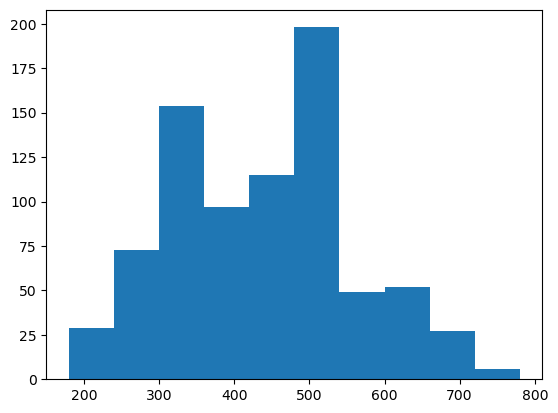

In [215]:
plt.hist(pokemon.Total)

Los datos no siguen una distribución normal, para que sigan una distribucion normal hay que transformar los datos, transformamos cada variable en su logaritmo, los valores entre 1 y 10 s expanden mientras que los mas altos se comprimen 

In [216]:
import numpy as np

# Obtén la columna transformada
tot_log = np.log(pokemon['Total'])

(array([ 15.,  16.,  37., 116.,  91., 105., 196., 134.,  62.,  28.]),
 array([5.19295685, 5.33959056, 5.48622426, 5.63285797, 5.77949168,
        5.92612539, 6.07275909, 6.2193928 , 6.36602651, 6.51266021,
        6.65929392]),
 <BarContainer object of 10 artists>)

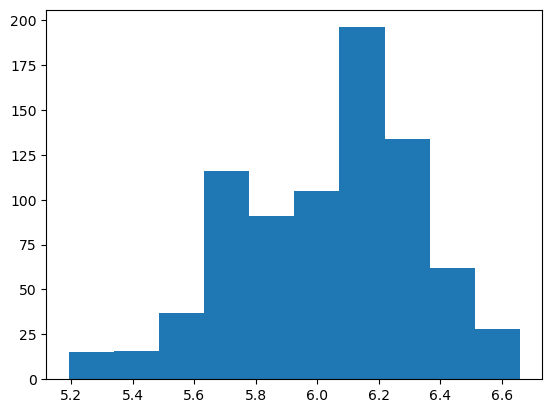

In [218]:
plt.hist(tot_log)

In [219]:
shapiro(pokemon.Total)

ShapiroResult(statistic=0.9817452430725098, pvalue=1.9299811526707344e-08)

Habría que utilizar otros metodos

con el standard scaler no busco una distribucion normal si no que mi media sea 0 y mi desviacion estandar sea 1

In [220]:
from sklearn.preprocessing import StandardScaler

(array([ 29.,  73., 154.,  97., 115., 198.,  49.,  52.,  27.,   6.]),
 array([-2.12783945, -1.62737251, -1.12690558, -0.62643864, -0.1259717 ,
         0.37449524,  0.87496218,  1.37542912,  1.87589605,  2.37636299,
         2.87682993]),
 <BarContainer object of 10 artists>)

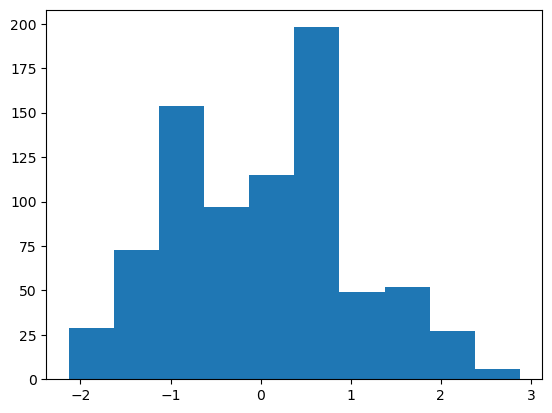

In [222]:

total_estandarizado = StandardScaler().fit_transform(pokemon['Total'].values.reshape(-1, 1))

plt.hist(total_estandarizado)

In [223]:
shapiro(total_estandarizado)

ShapiroResult(statistic=0.9817450642585754, pvalue=1.9297360154268972e-08)

In [226]:
shapiro(columna_transformada)

ShapiroResult(statistic=0.9832781553268433, pvalue=6.391303486452671e-08)

In [228]:
from scipy import stats

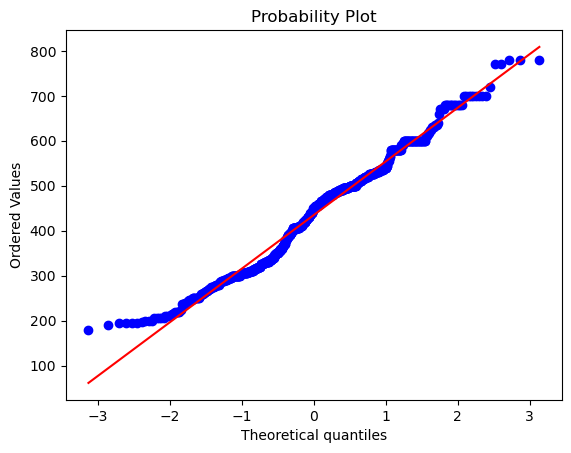

In [230]:
stats.probplot(pokemon.Total, plot=plt);

SHAPIRO ME FALLA

Este gráfico saca los cuantiles teoricos de una distribución normal ideal de los datos y lo compara con los datos reales 
los datos son prácticamente iguales a la lines

SI QUE ES NORMAL

(cada punto es un cuantil)

cuando los puntos se alejan quiere decir que tiene más pronunciada una cola u otra

no hay valores atipicos

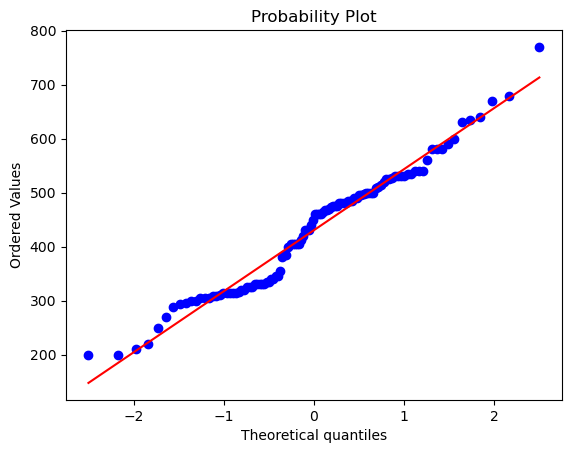

In [231]:
stats.probplot(pok_water.Total, plot=plt);

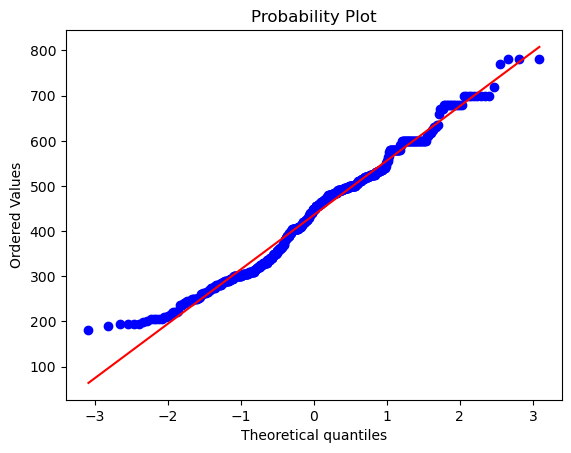

In [232]:
stats.probplot(pok_nowater.Total, plot=plt);